##Task 1
1. Write Python code to load the raw train_FD001.txt dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
2. Expected Output: DataFrame shape, info, and sample rows.

In [3]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Define column names for the dataset
column_names = ["engine_id", "cycle", "op_setting_1", "op_setting_2", "op_setting_3"] + [f"sensor_{i}" for i in range(1,22)]

# 3. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/train_FD001.txt', sep=r'\s+', header=None, names=column_names)

# 4. Inspect the dataset
print("Shape of the DataFrame:", df.shape)
print("First 5 rows of dataset:")
print(df.head())

Shape of the DataFrame: (20631, 26)
First 5 rows of dataset:
   engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0          1      1       -0.0007       -0.0004         100.0    518.67   
1          1      2        0.0019       -0.0003         100.0    518.67   
2          1      3       -0.0043        0.0003         100.0    518.67   
3          1      4        0.0007        0.0000         100.0    518.67   
4          1      5       -0.0019       -0.0002         100.0    518.67   

   sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0    641.82   1589.70   1400.60     14.62  ...     521.66    2388.02   
1    642.15   1591.82   1403.14     14.62  ...     522.28    2388.07   
2    642.35   1587.99   1404.20     14.62  ...     522.42    2388.03   
3    642.35   1582.79   1401.87     14.62  ...     522.86    2388.08   
4    642.37   1582.85   1406.22     14.62  ...     522.19    2388.04   

   sensor_14  sensor_15  sensor_16  sensor_17  sensor_1

In [4]:
# 5. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values if any exist
if df.isnull().any().any():
    df = df.fillna(method='ffill').fillna(method='bfill')
    print("Missing values after filling:", df.isnull().sum().sum())
else:
    print("No missing values detected.")

# 7. Save cleaned dataset to CSV
df.to_csv('cmapss_cleaned_train_FD001.csv', index=False)

# 8. Final summary
print(f"\nThe cleaned dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("Data loading and initial cleaning complete.")


Missing values per column:
engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64
No missing values detected.

The cleaned dataset has 20631 rows and 26 columns.
Data loading and initial cleaning complete.


# Task 2
 1. Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
 2. Expected Output: Three histogram plots and a summary/report on missing values per column.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CMAPSS dataset
df = pd.read_csv('/content/drive/MyDrive/PrognosAI/milestone_1/Day_1/cmapss_cleaned_train_FD001.csv')

#  Quick look at dataset
print("Shape of dataset:", df.shape)
print("First 5 rows:\n", df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values if any exist
if df.isnull().any().any():
    df = df.fillna(method='ffill').fillna(method='bfill')
    print("Missing values after filling:", df.isnull().sum().sum())
else:
    print("No missing values detected.")



Shape of dataset: (20631, 26)
First 5 rows:
    engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0          1      1       -0.0007       -0.0004         100.0    518.67   
1          1      2        0.0019       -0.0003         100.0    518.67   
2          1      3       -0.0043        0.0003         100.0    518.67   
3          1      4        0.0007        0.0000         100.0    518.67   
4          1      5       -0.0019       -0.0002         100.0    518.67   

   sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0    641.82   1589.70   1400.60     14.62  ...     521.66    2388.02   
1    642.15   1591.82   1403.14     14.62  ...     522.28    2388.07   
2    642.35   1587.99   1404.20     14.62  ...     522.42    2388.03   
3    642.35   1582.79   1401.87     14.62  ...     522.86    2388.08   
4    642.37   1582.85   1406.22     14.62  ...     522.19    2388.04   

   sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \


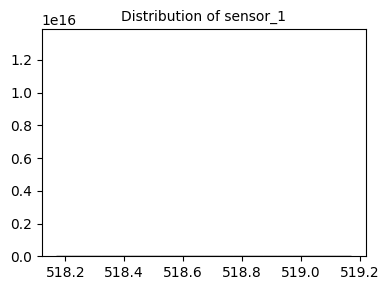

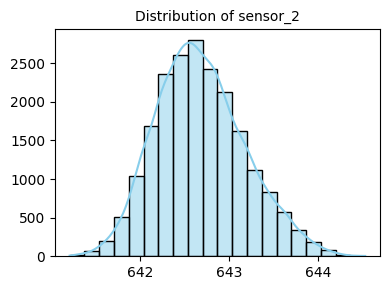

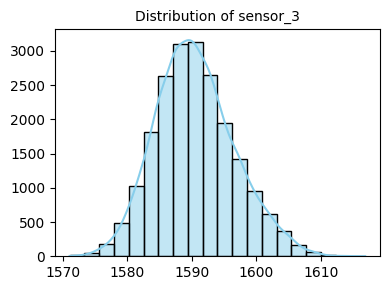

In [6]:
# Visualize distribution of three sensor
sensor_list = ['sensor_1', 'sensor_2', 'sensor_3']

for sensor in sensor_list:
    plt.figure(figsize=(4,3))  # small plot
    sns.histplot(df[sensor], bins=20, kde=True, color='skyblue')
    plt.title(f"Distribution of {sensor}", fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

#Task 3
1. For a selected sensor (e.g., sensor_2), compute and append to the DataFrame:
* The mean and standard deviation of sensor_2 by each engine_id
* Expected Output: Show a few sample rows with these new features.
2. Expected Output: Show a few sample rows with these new features.


In [7]:
import pandas as pd

# Load cleaned CMAPSS dataset
df = pd.read_csv('/content/drive/MyDrive/PrognosAI/milestone_1/Day_1/cmapss_cleaned_train_FD001.csv')

#  Compute engine-wise aggregate features for sensor_2 (Mean and standard deviation per engine)
sensor_agg = df.groupby('engine_id')['sensor_2'].agg(['mean', 'std']).reset_index()
sensor_agg.rename(columns={'mean':'sensor_2_mean_by_engine', 'std':'sensor_2_std_by_engine'}, inplace=True)

# Merge these features back to the main DataFrame
df = df.merge(sensor_agg, on='engine_id', how='left')

#  Compute rolling mean for sensor_2 (window=5 cycles) per engine
df['sensor_2_rollmean5'] = df.groupby('engine_id')['sensor_2'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

#  Display a few sample rows with new features
cols_to_show = ['engine_id', 'cycle', 'sensor_2', 'sensor_2_mean_by_engine', 'sensor_2_std_by_engine', 'sensor_2_rollmean5']
print(df[cols_to_show].head(10))

   engine_id  cycle  sensor_2  sensor_2_mean_by_engine  \
0          1      1    641.82               642.621042   
1          1      2    642.15               642.621042   
2          1      3    642.35               642.621042   
3          1      4    642.35               642.621042   
4          1      5    642.37               642.621042   
5          1      6    642.10               642.621042   
6          1      7    642.48               642.621042   
7          1      8    642.56               642.621042   
8          1      9    642.12               642.621042   
9          1     10    641.71               642.621042   

   sensor_2_std_by_engine  sensor_2_rollmean5  
0                0.486795          641.820000  
1                0.486795          641.985000  
2                0.486795          642.106667  
3                0.486795          642.167500  
4                0.486795          642.208000  
5                0.486795          642.264000  
6                0.486795

# Task 4
1. Normalize all sensor columns in the DataFrame using StandardScaler from scikit-learn (zero mean, unit variance) and create a new DataFrame, maintaining the original engine_id and cycle columns.
2. Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load cleaned CMAPSS dataset
df = pd.read_csv('/content/drive/MyDrive/PrognosAI/milestone_1/Day_1/cmapss_cleaned_train_FD001.csv')

#  Identify sensor columns to normalize
sensor_cols = [col for col in df.columns if 'sensor_' in col]

#  Initialize StandardScaler (zero mean, unit variance)
scaler = StandardScaler()

#  Create a copy of the dataset for scaling
df_scaled = df.copy()

#  Apply scaler to sensor columns
df_scaled[sensor_cols] = scaler.fit_transform(df[sensor_cols])

#  Display first 5 rows to check
print("Head of normalized sensor columns:")
print(df_scaled[['engine_id', 'cycle'] + sensor_cols].head())

#  Check means and standard deviations of normalized columns
print("\nMean of normalized columns (should be ~0):")
print(df_scaled[sensor_cols].mean().round(6))
print("\nStd of normalized columns (should be ~1):")
print(df_scaled[sensor_cols].std().round(6))

Head of normalized sensor columns:
   engine_id  cycle  sensor_1  sensor_2  sensor_3  sensor_4      sensor_5  \
0          1      1       0.0 -1.721725 -0.134255 -0.925936 -1.776357e-15   
1          1      2       0.0 -1.061780  0.211528 -0.643726 -1.776357e-15   
2          1      3       0.0 -0.661813 -0.413166 -0.525953 -1.776357e-15   
3          1      4       0.0 -0.661813 -1.261314 -0.784831 -1.776357e-15   
4          1      5       0.0 -0.621816 -1.251528 -0.301518 -1.776357e-15   

   sensor_6  sensor_7  sensor_8  ...  sensor_12  sensor_13  sensor_14  \
0  0.141683  1.121141 -0.516338  ...   0.334262  -1.058890  -0.269071   
1  0.141683  0.431930 -0.798093  ...   1.174899  -0.363646  -0.642845   
2  0.141683  1.008155 -0.234584  ...   1.364721  -0.919841  -0.551629   
3  0.141683  1.222827  0.188048  ...   1.961302  -0.224597  -0.520176   
4  0.141683  0.714393 -0.516338  ...   1.052871  -0.780793  -0.521748   

   sensor_15     sensor_16  sensor_17  sensor_18  sensor_19  se

# Task 5
1. Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
2. Expected Output: Array shape, example content, and confirmation of successful file saves.

In [10]:
import pandas as pd
import numpy as np

# Load cleaned CMAPSS dataset
df = pd.read_csv('/content/drive/MyDrive/PrognosAI/milestone_1/Day_1/cmapss_cleaned_train_FD001.csv')

# Define window size and exclude columns
window_stats = 5
window_size = 30
exclude_cols = ['engine_id', 'cycle']

# Rolling window stats
sensor_cols = [col for col in df.columns if 'sensor' in col]

for col in sensor_cols:
    df[f'{col}_rollmean{window_stats}'] = df.groupby('engine_id')[col].rolling(window_stats).mean().reset_index(0, drop=True)
    df[f'{col}_rollstd{window_stats}'] = df.groupby('engine_id')[col].rolling(window_stats).std().reset_index(0, drop=True)

# 3. Preparing features
feature_cols = [col for col in df.columns if col not in exclude_cols]

# Ensure the following
df = df.sort_values(['engine_id', 'cycle']).reset_index(drop=True)

# 4. Generating rolling window sequences
def generate_rolling_windows(data, engine_col, features, window_size=30):
    sequences = []
    engine_ids = []
    cycle_ids = []

    for engine in data[engine_col].unique():
        engine_data = data[data[engine_col] == engine]
        engine_features = engine_data[features].values

        for i in range(window_size - 1, len(engine_data)):
            seq = engine_features[i - window_size + 1: i + 1]
            sequences.append(seq)
            engine_ids.append(engine)
            cycle_ids.append(engine_data.iloc[i]['cycle'])

    sequences = np.array(sequences)
    return sequences, engine_ids, cycle_ids

# 5. Sequence genration
sequences, engine_ids, cycle_ids = generate_rolling_windows(df, 'engine_id', feature_cols, window_size)

# 6. Print output info
print("Shape of rolling window sequences:", sequences.shape)
print("Example sequence shape:", sequences[0].shape)
print(f"Engine ID: {engine_ids[0]}, Cycle: {cycle_ids[0]}")
print("Sequence data for first time window (shape {}):".format(sequences[0].shape))
print(sequences[0])

# 7. File saving
pd.DataFrame({'engine_id': engine_ids, 'cycle': cycle_ids}).to_csv('sequence_metadata.csv', index=False)
np.save('rolling_window_sequences.npy', sequences)
print("Sequences and metadata saved successfully.")

Shape of rolling window sequences: (17731, 30, 66)
Example sequence shape: (30, 66)
Engine ID: 1, Cycle: 30.0
Sequence data for first time window (shape (30, 66)):
[[-7.00000000e-04 -4.00000000e-04  1.00000000e+02 ...             nan
              nan             nan]
 [ 1.90000000e-03 -3.00000000e-04  1.00000000e+02 ...             nan
              nan             nan]
 [-4.30000000e-03  3.00000000e-04  1.00000000e+02 ...             nan
              nan             nan]
 ...
 [-2.40000000e-03  5.00000000e-04  1.00000000e+02 ...  6.14003257e-02
   2.33889200e+01  6.52350136e-02]
 [ 1.20000000e-03 -1.00000000e-04  1.00000000e+02 ...  5.84807661e-02
   2.33869400e+01  6.61123513e-02]
 [-2.20000000e-03  0.00000000e+00  1.00000000e+02 ...  7.42967025e-02
   2.33833800e+01  6.37311305e-02]]
Sequences and metadata saved successfully.
